In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df= pd.read_excel("Store Table neuro.xlsx")

In [9]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2
2,3,Spokane,Washington,Region 2,Old,2768.0,49554.0,3
3,4,Denton,Texas,Region 2,Old,2759.0,38284.0,4
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887.0,5


In [10]:
df.tail(n=5)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
2010,1295,Gainesville,Florida,Region 1,Old,2418.910277,33453.984223,1295
2011,1296,Dayton,Ohio,Region 1,Old,2418.521400,33449.189266,1296
2012,1297,Wichita Falls,Texas,Region 2,Old,2418.132522,33444.394310,1297
2013,1298,Naperville,Illinois,Region 1,Old,2417.743644,33439.599354,1298
2014,1299,Clovis,California,Region 2,Old,2417.354767,33434.804398,1299


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store ID         2015 non-null   int64  
 1   City             2015 non-null   object 
 2   State            2015 non-null   object 
 3   Sales Region     2015 non-null   object 
 4   New Expansion    2015 non-null   object 
 5   Marketing Spend  2015 non-null   float64
 6   Revenue          2015 non-null   float64
 7   Maket ID         2015 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 126.1+ KB


In [12]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Maket ID           0
dtype: int64

In [13]:
df.duplicated().sum()

15

In [14]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df[["Marketing Spend","Revenue"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing Spend,2000.0,2533.434768,245.965787,1811.0,2335.982102,2525.268336,2711.054671,3984.0
Revenue,2000.0,34866.098830,5049.059427,15562.0,32225.276691,34611.966150,36989.065696,68828.0


Text(0.5, 0, 'Marketing Spend')

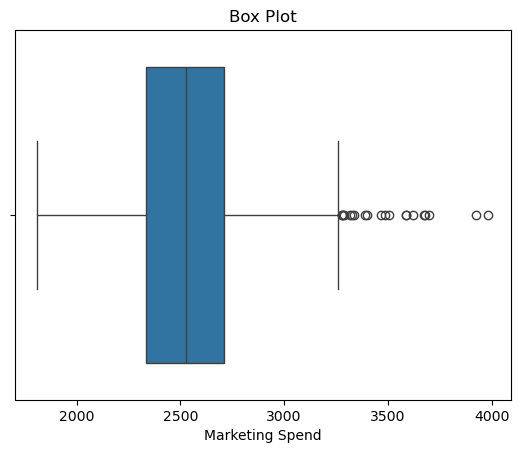

In [16]:
sns.boxplot(x=df["Marketing Spend"])
plt.title("Box Plot")
plt.xlabel("Marketing Spend")

Text(0.5, 0, 'Revenue')

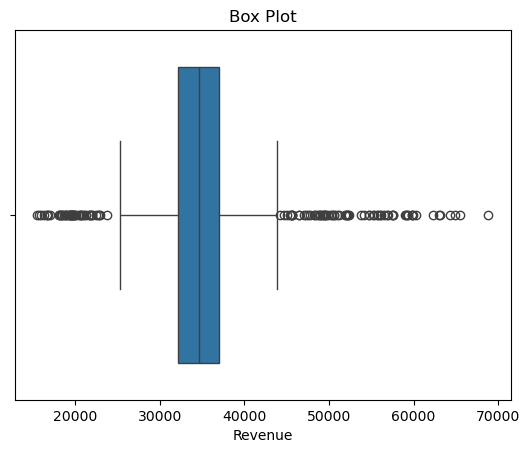

In [106]:
sns.boxplot(x=df["Revenue"])
plt.title("Box Plot")
plt.xlabel("Revenue")

In [18]:
def outliers (numbers):
    Q1=np.percentile(numbers,25)
    Q3=np.percentile(numbers,75)
    IQR=Q3-Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outliers_values= [i for i in numbers if i < min_outliers or i > max_outliers]
    return outliers_values
    

In [19]:
list[outliers(df["Revenue"])]

list[[48610.0, 45689.0, 49554.0, 59887.0, 53827.0, 60338.0, 19569.0, 59840.0, 64906.0, 16860.0, 21988.0, 19888.0, 54701.0, 18471.0, 16690.0, 47729.0, 63027.0, 19120.0, 56836.0, 52114.0, 20123.0, 49856.0, 55790.0, 45017.0, 56921.0, 22972.0, 22680.0, 65475.0, 21718.0, 59283.0, 20057.0, 20455.0, 64302.0, 49506.0, 52250.0, 57625.0, 16029.0, 49191.0, 59870.0, 48254.0, 16372.0, 50233.0, 50364.0, 44223.0, 17006.0, 15562.0, 21824.0, 46490.0, 19350.0, 16652.0, 23764.0, 19448.0, 68828.0, 19529.0, 55684.0, 45418.0, 18297.0, 18966.0, 18838.0, 52078.0, 58951.0, 49609.0, 45550.0, 19563.0, 57530.0, 54768.0, 18754.0, 21286.0, 48796.0, 19708.0, 56089.0, 19752.0, 20949.0, 45666.0, 47482.0, 18215.0, 50650.0, 48933.0, 15735.0, 20669.0, 20541.0, 45632.0, 22824.0, 21953.0, 51229.0, 50583.0, 50895.0, 46503.0, 18089.0, 56504.0, 44635.0, 19811.0, 56140.0, 54145.0, 51882.0, 49290.0, 47108.0, 20703.0, 18099.0, 18942.0, 52072.0, 55203.0, 59254.0, 21603.0, 21056.0, 57432.0, 18454.0, 59060.0, 19426.0, 47262.0, 1970

In [20]:
list[outliers(df["Marketing Spend"])]

list[[3466.0, 3287.0, 3679.0, 3620.0, 3335.0, 3488.0, 3399.0, 3392.0, 3924.0, 3697.0, 3329.0, 3285.0, 3277.0, 3984.0, 3319.0, 3507.0, 3586.0, 3587.0, 3279.0, 3675.0]]

In [21]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue', 'Maket ID'],
      dtype='object')

### Visualization

In [23]:
df["Sales Region"]= np.sort(df["Sales Region"])

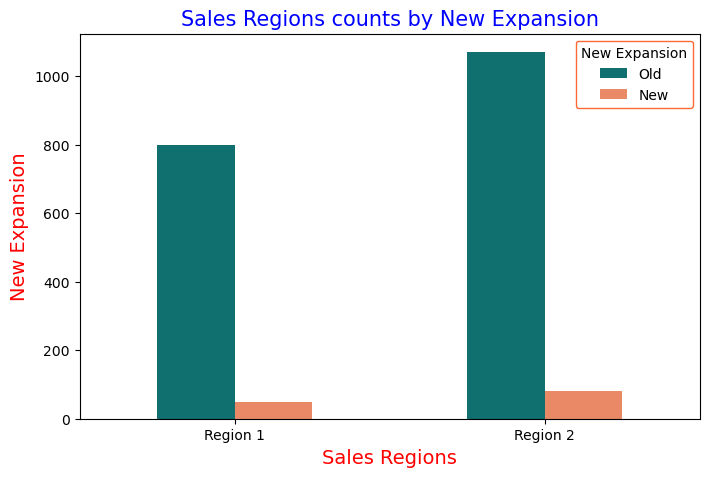

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Sales Region", hue="New Expansion",data=df,palette=("Teal","Coral"), width = 0.5)
plt.title("Sales Regions counts by New Expansion", fontsize=15, color="blue")
plt.xlabel("Sales Regions", fontsize=14, color="red")
plt.ylabel("New Expansion",fontsize=14,color="red")
plt.legend(title ="New Expansion", fontsize= 10, edgecolor="OrangeRed",facecolor="white",loc='upper right')
plt.show()

C:\Users\Timo Store\AppData\Local\Temp\ipykernel_8544\2035023594.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="New Expansion", y="Revenue",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)
C:\Users\Timo Store\AppData\Local\Temp\ipykernel_8544\2035023594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="New Expansion", y="Revenue",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)


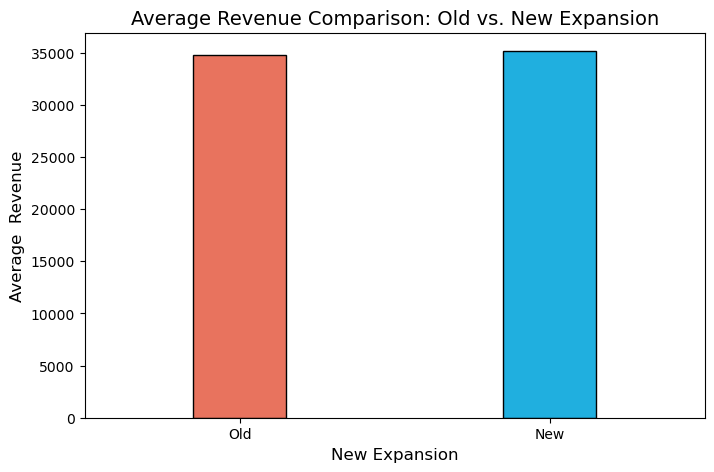

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x="New Expansion", y="Revenue",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)
plt.title("Average Revenue Comparison: Old vs. New Expansion", fontsize=14)
plt.xlabel("New Expansion", fontsize=12)
plt.ylabel("Average  Revenue", fontsize=12)
plt.show()

C:\Users\Timo Store\AppData\Local\Temp\ipykernel_8544\1408671085.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="New Expansion", y="Marketing Spend",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)
C:\Users\Timo Store\AppData\Local\Temp\ipykernel_8544\1408671085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="New Expansion", y="Marketing Spend",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)


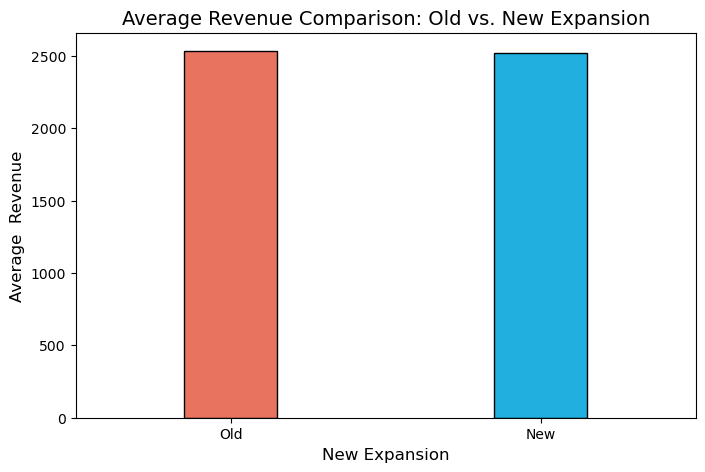

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x="New Expansion", y="Marketing Spend",data = df, estimator= np.mean,palette={"New": "DeepSkyBlue", "Old": "Tomato"}, edgecolor="black", width=0.3,ci=None)
plt.title("Average Revenue Comparison: Old vs. New Expansion", fontsize=14)
plt.xlabel("New Expansion", fontsize=12)
plt.ylabel("Average  Revenue", fontsize=12)
plt.show()

# Market data

In [28]:
df1=pd.read_excel("Market Table neuro.xlsx")

In [29]:
df1.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
0,1,AgriTech,326,Market Competition,Social Media Marketing,2.0
1,2,FinTech,249,Market Competition,Social Media Marketing,3.0
2,3,FinTech,915,Product Development Issues,Content Marketing,2.0
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2.0
4,5,RetailTech,609,Financial Constraints,Content Marketing,1.0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maket ID            2000 non-null   int64  
 1   Startup Type        2000 non-null   object 
 2   Company Size        2000 non-null   int64  
 3   Challenges          2000 non-null   object 
 4   Marketing Strategy  2000 non-null   object 
 5   Years in Market     1995 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


In [31]:
df1.isna().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       5
dtype: int64

In [32]:
df1.isnull().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       5
dtype: int64

In [33]:
df1.duplicated().sum()

0

In [34]:
df1["Years in Market"].unique()

array([ 2.,  3.,  1., nan])

In [35]:
df1["Years in Market"].value_counts()

Years in Market
1.0    709
3.0    650
2.0    636
Name: count, dtype: int64

In [36]:
df1["Years in Market"]= df1["Years in Market"].fillna(df1["Years in Market"].shift(1))

In [37]:
df1["Years in Market"].isnull().sum()

0

In [38]:
df1["Years in Market"].value_counts()

Years in Market
1.0    711
3.0    651
2.0    638
Name: count, dtype: int64

In [39]:
df1["Years in Market"]=df1["Years in Market"].astype(np.int8)
df1["Years in Market"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Years in Market
Non-Null Count  Dtype
--------------  -----
2000 non-null   int8 
dtypes: int8(1)
memory usage: 2.1 KB


In [40]:
df1.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
0,1,AgriTech,326,Market Competition,Social Media Marketing,2
1,2,FinTech,249,Market Competition,Social Media Marketing,3
2,3,FinTech,915,Product Development Issues,Content Marketing,2
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2
4,5,RetailTech,609,Financial Constraints,Content Marketing,1


In [41]:
df1["Company Size"].describe()

count    2000.000000
mean      501.331500
std       291.169663
min      -800.000000
25%       246.000000
50%       507.500000
75%       755.250000
max      1000.000000
Name: Company Size, dtype: float64

In [42]:
df1["Company Size"]=df1["Company Size"].replace({-800:800})
df1["Company Size"].describe()

count    2000.000000
mean      502.131500
std       289.787164
min         5.000000
25%       246.750000
50%       508.000000
75%       756.000000
max      1000.000000
Name: Company Size, dtype: float64

In [43]:
def categories (size):
    if 0 <= size < 10:
        return "Micro Enterprises"
    elif 10 <= size <= 49:
        return "Small Enterprises"
    elif 50<= size <=249:
        return "Medium Enterprises"
    else:
        return "Large Enterprises"

In [44]:
df1["Company Size"]=df1["Company Size"].apply(categories)

In [45]:
df1.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
0,1,AgriTech,Large Enterprises,Market Competition,Social Media Marketing,2
1,2,FinTech,Medium Enterprises,Market Competition,Social Media Marketing,3
2,3,FinTech,Large Enterprises,Product Development Issues,Content Marketing,2
3,4,RetailTech,Large Enterprises,Scaling and Growth,Direct Marketing,2
4,5,RetailTech,Large Enterprises,Financial Constraints,Content Marketing,1


In [46]:
df1["Company Size"].value_counts()

Company Size
Large Enterprises     1493
Medium Enterprises     408
Small Enterprises       90
Micro Enterprises        9
Name: count, dtype: int64

# Visualization

In [48]:
df1["Marketing Strategy"].unique()

array(['Social Media Marketing', 'Content Marketing', 'Direct Marketing',
       'Influencer Marketing', 'Event Marketing'], dtype=object)

In [49]:
df1["Startup Type"].unique()

array(['AgriTech', 'FinTech', 'RetailTech', 'EdTech', 'HealthTech',
       'FoodTech'], dtype=object)

In [50]:
df1["Years in Market"].value_counts()

Years in Market
1    711
3    651
2    638
Name: count, dtype: int64

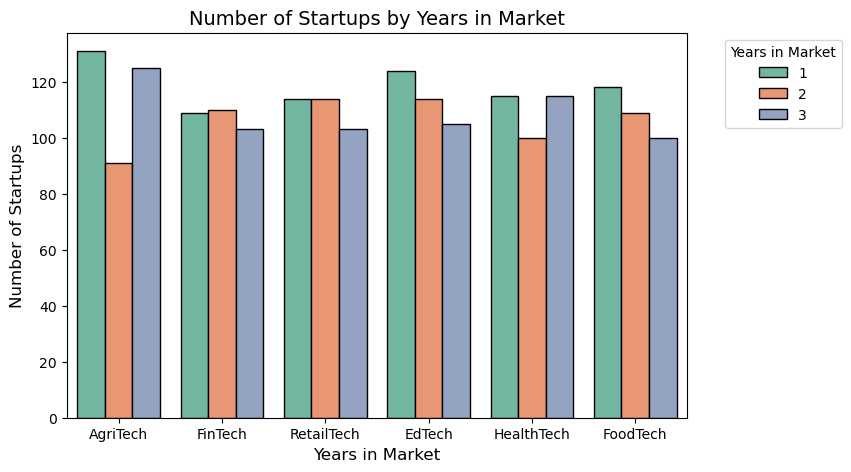

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x="Startup Type" ,hue = "Years in Market",data=df1, edgecolor="black", palette="Set2")
plt.title("Number of Startups by Years in Market", fontsize=14)
plt.xlabel("Years in Market", fontsize=12)
plt.ylabel("Number of Startups", fontsize=12)
plt.legend(title="Years in Market", bbox_to_anchor=(1.05, 1), loc='upper left')

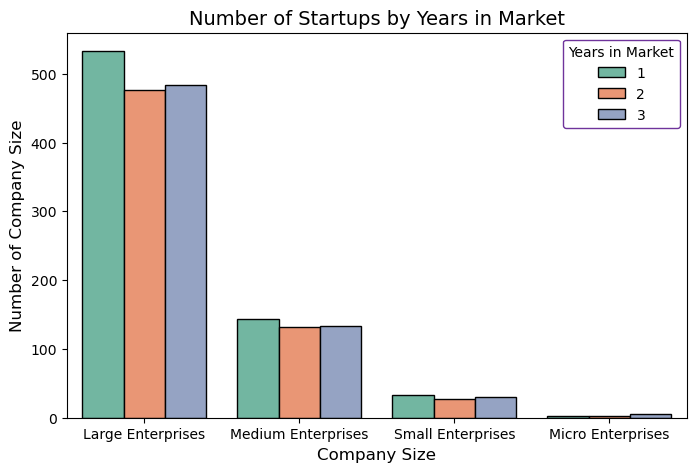

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x="Company Size" ,hue = "Years in Market",data=df1, edgecolor="black", palette="Set2")
plt.title("Number of Startups by Years in Market", fontsize=14)
plt.xlabel("Company Size", fontsize=12)  
plt.ylabel("Number of Company Size", fontsize=12)
plt.legend(title="Years in Market",edgecolor="indigo")

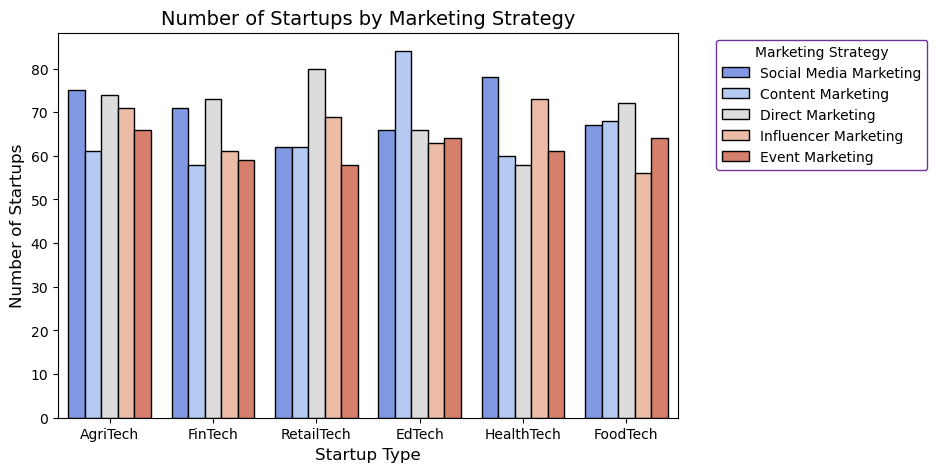

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x="Startup Type" ,hue = "Marketing Strategy",data=df1, edgecolor="black", palette="coolwarm")
plt.title("Number of Startups by Marketing Strategy", fontsize=14)
plt.xlabel("Startup Type", fontsize=12)  
plt.ylabel("Number of Startups", fontsize=12)
plt.legend(title="Marketing Strategy", bbox_to_anchor=(1.05, 1), loc='upper left',edgecolor="indigo")

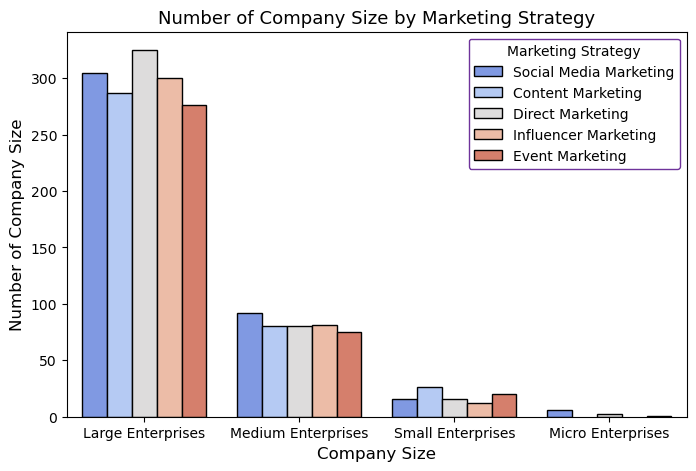

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x="Company Size" ,hue = "Marketing Strategy",data=df1, edgecolor="black", palette="coolwarm")
plt.title("Number of Company Size by Marketing Strategy", fontsize=13)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Number of Company Size", fontsize=12)
plt.legend(title="Marketing Strategy",edgecolor="indigo")

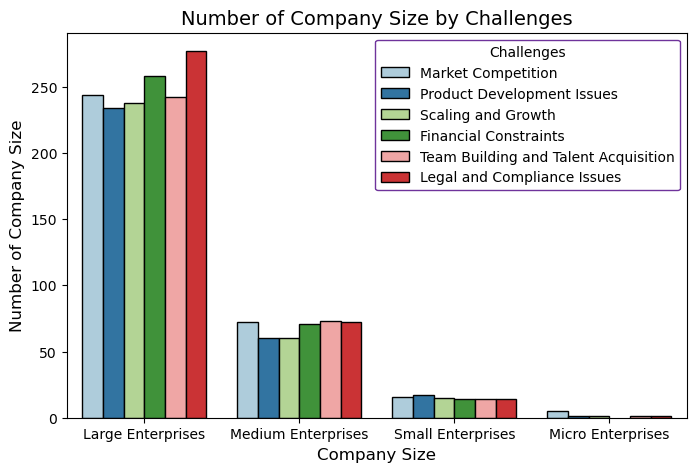

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x="Company Size" ,hue = "Challenges",data=df1, edgecolor="black", palette="Paired")
plt.title("Number of Company Size by Challenges", fontsize=14)  
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Number of Company Size", fontsize=12)
plt.legend(title="Challenges",edgecolor="indigo")

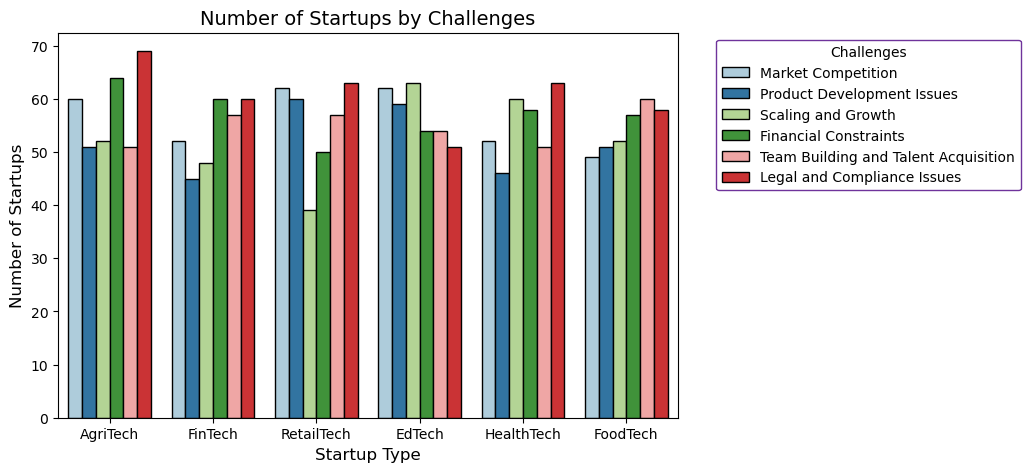

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x="Startup Type" ,hue = "Challenges",data=df1, edgecolor="black", palette="Paired")
plt.title("Number of Startups by Challenges", fontsize=14)
plt.xlabel("Startup Type", fontsize=12)
plt.ylabel("Number of Startups", fontsize=12)
plt.legend(title="Challenges",edgecolor="indigo",bbox_to_anchor=(1.05, 1), loc='upper left')